## 1. Google
## 2. Stackoverflow
## 3. Documentation

[Pandas Documentation](https://pandas.pydata.org/docs/getting_started/intro_tutorials/index.html)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

In [ ]:
%cd '/content/drive/MyDrive/classes/4001 7001/SPRING 2022/MODULE 01'

/content/drive/MyDrive/classes/4001 7001/SPRING 2022/MODULE 01


In [ ]:
!ls 'data'

incidents.csv


## read csv data

In [ ]:
df = pd.read_csv('data/incidents.csv')

In [ ]:
# df.head()

In [ ]:
# nrows is used to limit number of rows to read
df = pd.read_csv('data/incidents.csv',nrows=2)
# df = pd.read_csv('data/probe.csv',nrows=5000)

In [ ]:
df.head()

,eventId,type,main,cross,longitude,latitude,descripton,start,estStop,clear
0,100000,1024,Roadwork,IL 140,JUST EAST OF IL-160,0,0,2011-11-28 15:59:00.000,2012-07-01 09:00:00.000,2012-03-29 21:35:00.000
1,100001,1024,Roadwork,I-55/70,AT IL 203,-90128280,38645390,2012-03-05 08:35:00.000,2012-12-31 16:00:00.000,2012-04-19 06:33:00.000
2,100002,1024,Roadwork,IL 3,STOLLE RD.,-90195200,38543900,2012-03-07 14:28:00.000,2013-05-31 15:00:00.000,2012-04-19 06:34:00.000
3,100003,1024,Roadwork,I-270,AT IL 111,-90066920,38757800,2012-03-08 21:01:00.000,2012-07-05 15:00:00.000,2012-05-03 01:00:12.000
4,100004,512,AccidentsAndIncidents,US 67,CLARK BRIDGE,-90181490,38880840,2012-03-30 07:16:00.000,2012-03-30 15:00:00.000,2012-03-29 20:23:00.000


In [ ]:
df['incident'].tail()

366023    AccidentsAndIncidents
366024    AccidentsAndIncidents
366025    AccidentsAndIncidents
366026    AccidentsAndIncidents
366027    AccidentsAndIncidents
Name: incident, dtype: object

In [ ]:
df.columns

Index(['eventId', 'type', 'main', 'cross', 'longitude', 'latitude',
       'descripton', 'start', 'estStop', 'clear'],
      dtype='object')

In [ ]:
df.columns = ['eventId', 'type', 'incident','main', 'cross', 'longitude', 'latitude', 'start', 'estStop', 'clear']
df.head()
df['speed'].head()

,eventId,type,incident,main,cross,longitude,latitude,start,estStop,clear
0,100000,1024,Roadwork,IL 140,JUST EAST OF IL-160,0,0,2011-11-28 15:59:00.000,2012-07-01 09:00:00.000,2012-03-29 21:35:00.000
1,100001,1024,Roadwork,I-55/70,AT IL 203,-90128280,38645390,2012-03-05 08:35:00.000,2012-12-31 16:00:00.000,2012-04-19 06:33:00.000
2,100002,1024,Roadwork,IL 3,STOLLE RD.,-90195200,38543900,2012-03-07 14:28:00.000,2013-05-31 15:00:00.000,2012-04-19 06:34:00.000
3,100003,1024,Roadwork,I-270,AT IL 111,-90066920,38757800,2012-03-08 21:01:00.000,2012-07-05 15:00:00.000,2012-05-03 01:00:12.000
4,100004,512,AccidentsAndIncidents,US 67,CLARK BRIDGE,-90181490,38880840,2012-03-30 07:16:00.000,2012-03-30 15:00:00.000,2012-03-29 20:23:00.000


In [ ]:
## show data types
df.dtypes

eventId       int64
type          int64
incident     object
main         object
cross        object
longitude     int64
latitude      int64
start        object
estStop      object
clear        object
dtype: object

In [ ]:
df['start'] = pd.to_datetime(df['start'])

In [ ]:
df['start'] = pd.to_datetime(df['start'])  
df['estStop']= pd.to_datetime(df['estStop'])
df['clear']= pd.to_datetime(df['clear'])

df['latitude']= df['latitude'].astype(int)/1000000
df['longitude']= df['longitude'].astype(int)/1000000

df.dtypes

eventId               int64
type                  int64
incident             object
main                 object
cross                object
longitude           float64
latitude            float64
start        datetime64[ns]
estStop      datetime64[ns]
clear        datetime64[ns]
dtype: object

In [ ]:
df.head()

,eventId,type,incident,main,cross,longitude,latitude,start,estStop,clear
0,100000,1024,Roadwork,IL 140,JUST EAST OF IL-160,0.00000,0.00000,2011-11-28 15:59:00,2012-07-01 09:00:00,2012-03-29 21:35:00
1,100001,1024,Roadwork,I-55/70,AT IL 203,-90.12828,38.64539,2012-03-05 08:35:00,2012-12-31 16:00:00,2012-04-19 06:33:00
2,100002,1024,Roadwork,IL 3,STOLLE RD.,-90.19520,38.54390,2012-03-07 14:28:00,2013-05-31 15:00:00,2012-04-19 06:34:00
3,100003,1024,Roadwork,I-270,AT IL 111,-90.06692,38.75780,2012-03-08 21:01:00,2012-07-05 15:00:00,2012-05-03 01:00:12
4,100004,512,AccidentsAndIncidents,US 67,CLARK BRIDGE,-90.18149,38.88084,2012-03-30 07:16:00,2012-03-30 15:00:00,2012-03-29 20:23:00


In [ ]:
# df['start'].dt.dayofweek

In [ ]:
df['duration'] = (df['clear'] - df['start']).astype('timedelta64[m]')


In [ ]:
df.head()

,eventId,type,incident,main,cross,longitude,latitude,start,estStop,clear,duration
0,100000,1024,Roadwork,IL 140,JUST EAST OF IL-160,0.00000,0.00000,2011-11-28 15:59:00,2012-07-01 09:00:00,2012-03-29 21:35:00,176016.0
1,100001,1024,Roadwork,I-55/70,AT IL 203,-90.12828,38.64539,2012-03-05 08:35:00,2012-12-31 16:00:00,2012-04-19 06:33:00,64678.0
2,100002,1024,Roadwork,IL 3,STOLLE RD.,-90.19520,38.54390,2012-03-07 14:28:00,2013-05-31 15:00:00,2012-04-19 06:34:00,61446.0
3,100003,1024,Roadwork,I-270,AT IL 111,-90.06692,38.75780,2012-03-08 21:01:00,2012-07-05 15:00:00,2012-05-03 01:00:12,79439.0
4,100004,512,AccidentsAndIncidents,US 67,CLARK BRIDGE,-90.18149,38.88084,2012-03-30 07:16:00,2012-03-30 15:00:00,2012-03-29 20:23:00,-653.0


In [ ]:
# df['duration'].mean()
# df['duration'].std()
df['duration'].quantile(0.95)

494.0

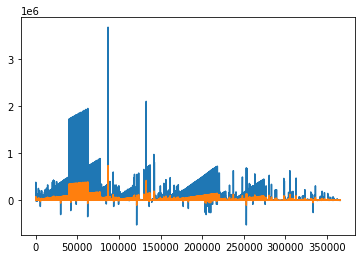

In [ ]:
df['duration'].plot()
(df['duration']/5).plot()

In [ ]:
## manipulate columns
# add a column 
# df['month'] = df['start'].dt.month
# df['duration_hour'] = df['duration']/60
# # # df.head()
# # # #drop a column
# df = df.drop('year',1)
# # # df.head()
df_select = df[['eventId','start','duration']]
df_select.head()

,eventId,start,duration
0,100000,2011-11-28 15:59:00,176016.0
1,100001,2012-03-05 08:35:00,64678.0
2,100002,2012-03-07 14:28:00,61446.0
3,100003,2012-03-08 21:01:00,79439.0
4,100004,2012-03-30 07:16:00,-653.0


In [ ]:
df.tail()

,eventId,type,incident,main,cross,longitude,latitude,start,estStop,clear,duration,month
366023,494648,512,AccidentsAndIncidents,I-64 EB,BEFORE HAMPTON AVE,-90.298355,38.632727,2020-10-06 10:22:13.920,2020-10-06 10:52:13.920,NaT,NaN,10
366024,494649,512,AccidentsAndIncidents,I-55 SB,AT BATES ST,-90.242115,38.565065,2020-10-06 10:24:25.973,2020-10-06 10:54:25.973,NaT,NaN,10
366025,494650,512,AccidentsAndIncidents,US 67 NB,AT I-70,-90.396258,38.741510,2020-10-06 10:28:21.967,2020-10-06 10:58:21.967,2020-10-06 10:31:00,2.0,10
366026,494651,512,AccidentsAndIncidents,I-55 NB,AT MO 141,-90.379578,38.442977,2020-10-06 10:33:32.047,2020-10-06 11:03:32.047,2020-10-06 10:34:00,0.0,10
366027,494652,512,AccidentsAndIncidents,I-70 EB,BEFORE ZUMBEHL RD,-90.536483,38.787223,2020-10-06 10:40:14.653,2020-10-06 11:40:14.653,NaT,NaN,10


In [ ]:
## filter dataframe
## get data for unique incident
# 1. filter data for single incident
# 2. select data for that incident 
# df_filt = df[df['eventId'] == 'something']
df_filt = df[df['incident'] == 'AccidentsAndIncidents']
df_filt.head()
# df = df[df['duration']>0]

,eventId,type,incident,main,cross,longitude,latitude,start,estStop,clear,duration,month
4,100004,512,AccidentsAndIncidents,US 67,CLARK BRIDGE,-90.181490,38.880840,2012-03-30 07:16:00.000,2012-03-30 15:00:00.000,2012-03-29 20:23:00,-653.0,3
15,100015,512,AccidentsAndIncidents,W 30 MO,NaN,-90.435761,38.516135,2012-03-29 18:30:35.013,2012-03-29 19:15:35.013,2012-03-29 18:54:00,23.0,3
19,100022,512,AccidentsAndIncidents,I-70 EB,BEFORE UNION,-90.257335,38.691149,2012-03-30 00:16:23.423,2012-03-30 01:11:23.423,2012-03-30 01:00:00,43.0,3
20,100023,512,AccidentsAndIncidents,I-64 WB,AT CLAYTON AVE,-90.302574,38.631986,2012-03-30 07:23:30.827,2012-03-30 08:08:30.827,2012-03-30 08:05:00,41.0,3
21,100024,512,AccidentsAndIncidents,I-270 NB,PAST I-44,-90.433493,38.555885,2012-03-30 07:56:53.443,2012-03-30 08:21:53.443,2012-03-30 07:59:00,2.0,3


In [ ]:
df['year'] = df['start'].dt.year
df['dow'] = df['start'].dt.weekday
df['hour'] = df['start'].dt.hour

In [ ]:
df.tail()

,eventId,type,incident,main,cross,longitude,latitude,start,estStop,clear,duration,month,year,dow,hour
366023,494648,512,AccidentsAndIncidents,I-64 EB,BEFORE HAMPTON AVE,-90.298355,38.632727,2020-10-06 10:22:13.920,2020-10-06 10:52:13.920,NaT,NaN,10,2020,1,10
366024,494649,512,AccidentsAndIncidents,I-55 SB,AT BATES ST,-90.242115,38.565065,2020-10-06 10:24:25.973,2020-10-06 10:54:25.973,NaT,NaN,10,2020,1,10
366025,494650,512,AccidentsAndIncidents,US 67 NB,AT I-70,-90.396258,38.741510,2020-10-06 10:28:21.967,2020-10-06 10:58:21.967,2020-10-06 10:31:00,2.0,10,2020,1,10
366026,494651,512,AccidentsAndIncidents,I-55 NB,AT MO 141,-90.379578,38.442977,2020-10-06 10:33:32.047,2020-10-06 11:03:32.047,2020-10-06 10:34:00,0.0,10,2020,1,10
366027,494652,512,AccidentsAndIncidents,I-70 EB,BEFORE ZUMBEHL RD,-90.536483,38.787223,2020-10-06 10:40:14.653,2020-10-06 11:40:14.653,NaT,NaN,10,2020,1,10


In [ ]:
df['month'].tail()*2

366023    20
366024    20
366025    20
366026    20
366027    20
Name: month, dtype: int64

In [ ]:
## apply a function to a column
## avoid looping through a dataframe if you can. 
def congestion_level(duration):
  if duration > 0 and duration < 15:
    return 'free-flow'
  elif duration>15 and duration<=60:
    return 'congested'
  else:
    return 'jam'

In [ ]:
df['congested_level'] = df['duration'].apply(lambda x:x*2 if x>40 else x*5)

In [ ]:
df['congested_level'] = df['duration'].apply(congestion_level)
df.head(20)

,eventId,type,incident,main,cross,longitude,latitude,start,estStop,clear,duration,month,year,dow,hour,congested_level
0,100000,1024,Roadwork,IL 140,JUST EAST OF IL-160,0.000000,0.000000,2011-11-28 15:59:00.000,2012-07-01 09:00:00.000,2012-03-29 21:35:00,176016.0,11,2011,0,15,jam
1,100001,1024,Roadwork,I-55/70,AT IL 203,-90.128280,38.645390,2012-03-05 08:35:00.000,2012-12-31 16:00:00.000,2012-04-19 06:33:00,64678.0,3,2012,0,8,jam
2,100002,1024,Roadwork,IL 3,STOLLE RD.,-90.195200,38.543900,2012-03-07 14:28:00.000,2013-05-31 15:00:00.000,2012-04-19 06:34:00,61446.0,3,2012,2,14,jam
3,100003,1024,Roadwork,I-270,AT IL 111,-90.066920,38.757800,2012-03-08 21:01:00.000,2012-07-05 15:00:00.000,2012-05-03 01:00:12,79439.0,3,2012,3,21,jam
4,100004,512,AccidentsAndIncidents,US 67,CLARK BRIDGE,-90.181490,38.880840,2012-03-30 07:16:00.000,2012-03-30 15:00:00.000,2012-03-29 20:23:00,-653.0,3,2012,4,7,jam
5,100005,1024,Roadwork,I-64,WEST OF IL 159,-89.990660,38.599740,2012-03-30 07:41:00.000,2012-03-30 15:00:00.000,2012-03-30 15:12:55,451.0,3,2012,4,7,jam
6,100006,1024,Roadwork,I-255,AT STATE STREET,-90.085290,38.602750,2012-03-26 09:20:00.000,2012-03-30 13:00:00.000,2012-03-30 14:02:04,6042.0,3,2012,0,9,jam
7,100007,1024,Roadwork,IL 100,JOE PAGE BRIDGE,-90.613200,39.160400,2012-04-03 08:00:00.000,2012-04-05 15:00:00.000,2012-04-03 21:25:59,805.0,4,2012,1,8,jam
8,100008,1024,Roadwork,I-70,MILE POST 48,-89.343500,38.880890,2012-04-02 09:22:00.000,2012-04-06 08:00:00.000,2012-04-06 13:47:03,6025.0,4,2012,0,9,jam
9,100009,1024,Roadwork,I-70,MILE POST 48,-89.343500,38.880890,2012-04-09 08:00:00.000,2012-04-11 08:00:00.000,2012-04-09 17:10:47,550.0,4,2012,0,8,jam


In [ ]:
df.head()

,eventId,type,incident,main,cross,longitude,latitude,start,estStop,clear,duration,congested_level,year,dow,hour
0,100000,1024,Roadwork,IL 140,JUST EAST OF IL-160,0.00000,0.00000,2011-11-28 15:59:00,2012-07-01 09:00:00,2012-03-29 21:35:00,176016.0,jam,2011,0,15
1,100001,1024,Roadwork,I-55/70,AT IL 203,-90.12828,38.64539,2012-03-05 08:35:00,2012-12-31 16:00:00,2012-04-19 06:33:00,64678.0,jam,2012,0,8
2,100002,1024,Roadwork,IL 3,STOLLE RD.,-90.19520,38.54390,2012-03-07 14:28:00,2013-05-31 15:00:00,2012-04-19 06:34:00,61446.0,jam,2012,2,14
3,100003,1024,Roadwork,I-270,AT IL 111,-90.06692,38.75780,2012-03-08 21:01:00,2012-07-05 15:00:00,2012-05-03 01:00:12,79439.0,jam,2012,3,21
5,100005,1024,Roadwork,I-64,WEST OF IL 159,-89.99066,38.59974,2012-03-30 07:41:00,2012-03-30 15:00:00,2012-03-30 15:12:55,451.0,jam,2012,4,7


In [ ]:
## aggregate 
## count number of incidents by dow and hour
# get mean duration
df_grp = df.groupby(['dow','hour']).agg({'eventId':'count','duration':'mean'}).reset_index()
# df_grp.columns = ['dow','hour','count','duration']
# df_grp = df_grp.sort_values(['count','duration'],ascending=False)

df_grp.head()

,dow,hour,eventId,duration
0,0,0,737,12740.635007
1,0,1,464,504.265086
2,0,2,470,157.706383
3,0,3,429,82.049065
4,0,4,348,1063.654179


In [ ]:
df_grp.sort_values(by='eventId',ascending=False).head(10)

,dow,hour,eventId,duration
57,2,9,5867,17401.074655
81,3,9,5624,910.807932
9,0,9,5500,11815.419713
33,1,9,5466,314.577705
105,4,9,4995,777.992793
64,2,16,4913,5341.950539
56,2,8,4913,11488.751679
39,1,15,4862,187.009257
80,3,8,4807,940.372451
15,0,15,4785,4909.319331


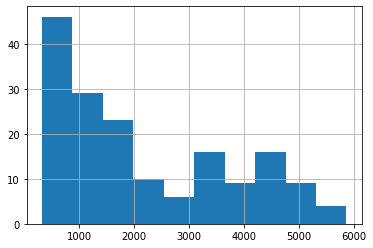

In [ ]:
## graphing
df_grp['eventId'].hist()

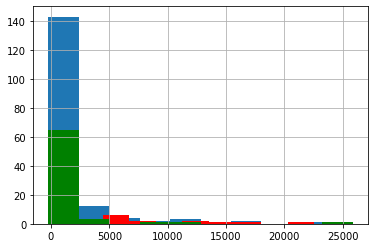

In [ ]:
# df_grp['duration'].hist()
df_grp[(df_grp['eventId']>1200) & df_grp['eventId']<2400]['duration'].hist()
df_grp[(df_grp['eventId']>2400) ]['duration'].hist(color='red')
df_grp[df_grp['eventId']<1200]['duration'].hist(bins=10,color='green')